# 高级表达式操作

参考 [Advanced Expression Manipulation](https://docs.sympy.org/latest/tutorial/manipulation.html)

在本节中，我们将讨论一些可以对表达式执行高级操作的方法。

## 理解表达式树

在我们这样做之前，我们需要了解表达式在 SymPy 中是如何表示的。数学表达式表示为一棵树。让我们采用表达式 $x^2+xy$，即 `x**2 + x*y`。我们可以通过使用 `srepr` 在内部看到这个表达式的样子

In [1]:
import warnings
from sympy import *
import pydot
from IPython.display import SVG

warnings.filterwarnings('ignore')

def display_dot(expr):
    g = pydot.graph_from_dot_data(dotprint(expr))[0]
    g.set_bgcolor('lightyellow')
    t = SVG(g.create_svg())
    return t

In [2]:
x, y, z = symbols('x y z')

expr = x**2 + x*y
srepr(expr)

"Add(Pow(Symbol('x'), Integer(2)), Mul(Symbol('x'), Symbol('y')))"

拆解这个最简单的方法是查看表达式树的图表：

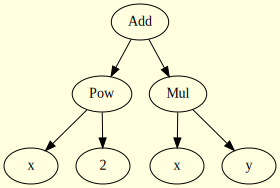

In [3]:
display_dot(expr)

```{note}
上图是使用 [Graphviz](http://www.graphviz.org/) 和 [`dotprint`](https://docs.sympy.org/latest/modules/printing.html#sympy.printing.dot.dotprint "sympy.printing.dot.dotprint") 函数制作的。
```

首先，让我们看看这棵树的叶子。符号是类 `Symbol` 的实例。虽然我们一直在做

In [4]:
x = symbols('x')

我们也可以做到

In [5]:
x = Symbol('x')

无论哪种方式，我们都会得到一个名为“x”的 Symbol。对于表达式中的数字 2，我们得到了 `Integer(2)`。`Integer` 是整数的 SymPy 类。它类似于 Python 的内置类型 `int`，不同之处在于 `Integer` 可以很好地与其他 SymPy 类型一起使用。

当我们写 `x**2` 时，这会创建一个 `Pow` 对象。`Pow` 是“power”的缩写。

In [6]:
srepr(x**2)

"Pow(Symbol('x'), Integer(2))"

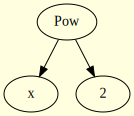

In [7]:
display_dot(x**2)

我们可以通过调用 `Pow(x, 2)` 创建相同的对象

In [8]:
Pow(x, 2)

x**2

其他的运算以此类推：

In [9]:
expr = sin(x*y)/2 - x**2 + 1/y
expr

-x**2 + sin(x*y)/2 + 1/y

In [10]:
srepr(expr)

"Add(Mul(Integer(-1), Pow(Symbol('x'), Integer(2))), Mul(Rational(1, 2), sin(Mul(Symbol('x'), Symbol('y')))), Pow(Symbol('y'), Integer(-1)))"

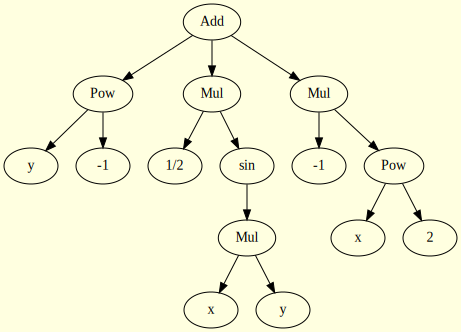

In [11]:
display_dot(expr)